# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [4]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    from sklearn.datasets import make_classification

    def generate_data():
        x, y = make_classification(n_samples=1500, 
                                n_features = 20,
                                n_informative = 8,
                                n_redundant = 5,
                                n_repeated = 1, 
                                n_classes = 3,
                                weights = (0.5, 0.25, 0.25),
                                random_state = 120
                                )
        colNames = ['var'+str(x) for x in range(20)]
        colNames.append('target')

        df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    #     df.to_csv('pca-dataset.csv', index=False)
        return df

    df = generate_data()

In [5]:
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [7]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA to the standardized data
pca = PCA()
pca.fit(X_train_scaled)

# Determine the number of components to retain 95% of variance
threshold = 0.95
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
n_components = next(i for i, total_variance in enumerate(cumulative_variance_ratio) if total_variance >= threshold) + 1

# Transform the data using PCA with the optimal number of components
pca_optimal = PCA(n_components=n_components)
X_train_pca = pca_optimal.fit_transform(X_train_scaled)

# Output the number of components and transformed dataset
print(f"Optimal number of components: {n_components}")
print(f"Transformed dataset shape: {X_train_pca.shape}")


Optimal number of components: 13
Transformed dataset shape: (1200, 13)


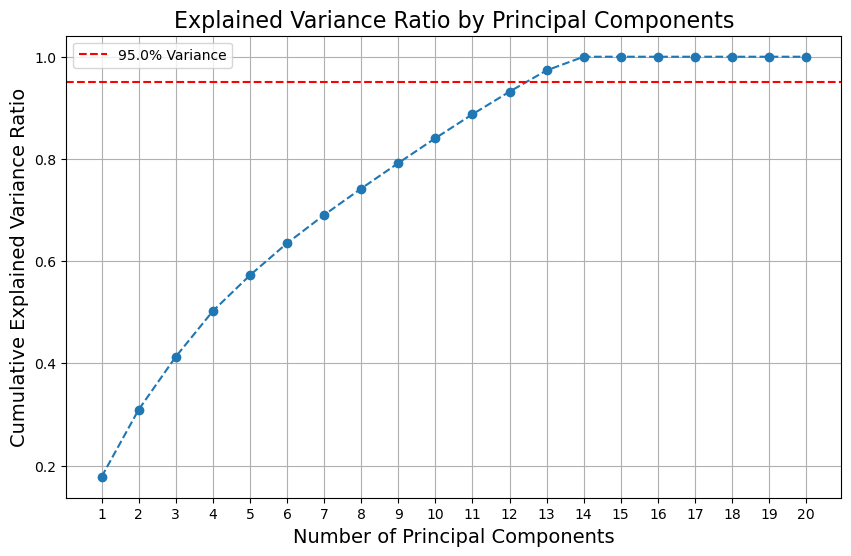

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold * 100}% Variance')
plt.title('Explained Variance Ratio by Principal Components', fontsize=16)
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=14)
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))
plt.grid(True)
plt.legend()
plt.show()

The code uses >= threshold to ensure the exact number of components is sufficient to meet the 95% variance requirement.
If the 12th component doesn't fully meet 95%, the 13th component is included to satisfy the condition.

# Describe Results

After applying Principal Component Analysis (PCA) on the dataset, 13 components are sufficient to explain at least 95% of the variance in the data. This means that the first 13 principal components capture almost all the important information (variability) from the original (var0 to var19).

The dimensionality of the data has been reduced from 20 features to 13 features, significantly simplifying the dataset while retaining most of the information.

<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

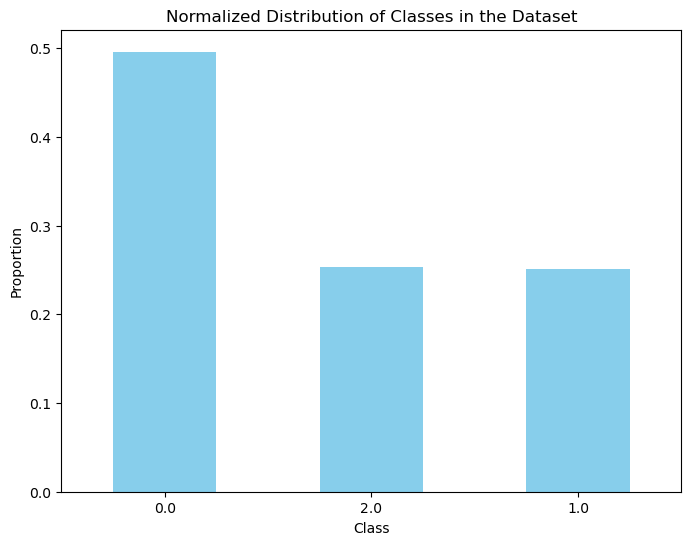

In [17]:
target_distribution = df['target'].value_counts(normalize=True)

# Plotting the normalized class distribution
plt.figure(figsize=(8, 6))
target_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Normalized Distribution of Classes in the Dataset')
plt.xticks(rotation=0)  
plt.show()

In [18]:
#unique value counts
unique_value_counts = df['target'].value_counts()

unique value counts
print("Unique Value Counts in Target:")
print(unique_value_counts)

Unique Value Counts in Target:
0.0    744
2.0    380
1.0    376
Name: target, dtype: int64


> Describe your results here

1. Class 0.0 == 50% of the data,  
2. 1.0 and 2.0 each make up ~25%. 

Accuracy can not be used because there is not balanced. Since the data is imbalanced the model could favor 0 and still give a  high accuracy without being accurate (1.0 and 2.0).

# Metric - F1


The F1-score is the harmonic mean of precision and recall. It balances the trade-off between false positives and false negatives, which is critical when dealing with imbalanced data.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df[[col for col in df.columns if col.startswith('var')]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=123)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Classification report for detailed analysis
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7033
Precision: 0.7040
Recall: 0.7033

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.76       153
         1.0       0.68      0.59      0.63        74
         2.0       0.62      0.68      0.65        73

    accuracy                           0.70       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.70      0.70      0.70       300



> Describe results here

Class 0.0 : F1-Score: 76% 
The model performs the best for this class, as it has the highest F1-score. This is due to the larger representation (~50%) of this class in the dataset, making it easier for the model to predict correctly.

Class 1.0: F1-Score63%
The model struggles for this class, as both precision (68%) and recall (59%) are lower, leading to a relatively moderate F1-score. The  representation of this class (~25%) contributes to the challenge in accurately predicting it.

Class 2.0: F1-Score: 65%
The model performs slightly better in comparision for this class than for 1.0. The recall (68%) is higher than precision (62%), leading to a decent F1-score. However, the class imbalance still impacts the performance.

# Insights

The logistic regression model performs well overall, with strong results for the majority class (0.0). However, it struggles with the minority classes (1.0 and 2.0), particularly in terms of recall, which reduces their F1-scores.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# pipeline with PCA and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=13)), 
    ('log_reg', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=123))
])

# Training the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_pca = pipeline.predict(X_test)

# Evaluating the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='weighted')
recall_pca = recall_score(y_test, y_pred_pca, average='weighted')

# Printing the results

print(f"Accuracy with PCA: {accuracy_pca:.4f}")
print(f"Precision with PCA: {precision_pca:.4f}")
print(f"Recall with PCA: {recall_pca:.4f}")


print("\nClassification Report with PCA:")
print(classification_report(y_test, y_pred_pca))


Accuracy with PCA: 0.7100
Precision with PCA: 0.7091
Recall with PCA: 0.7100

Classification Report with PCA:
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.77       153
         1.0       0.68      0.59      0.63        74
         2.0       0.65      0.68      0.67        73

    accuracy                           0.71       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.71      0.71      0.71       300



#focussing on all metrics  though main is F1
Class 0.0 : Precision: 75%, Recall: 78%, F1-Score: 77%
The model performs best on this class due to its larger representation in the data (~50%).

Class 1.0: Precision: 68%, Recall: 59%, F1-Score: 63%
Performance is similar to the original model but slightly improved in F1-score.

Class 2.0:Precision: 65%, Recall: 68%, F1-Score: 67%
Minor improvements in F1-score over the original model.

# Insights
Using PCA in the pipeline improves the logistic regression model slightly. It reduces the dimensionality of the dataset which simplifies the data and potentially reduces overfitting. The improvement is small but notable, especially for the minority classes.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Creating  Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=123, max_depth=5)  
decision_tree.fit(X_train, y_train)

#predictions on the test data
y_pred_tree = decision_tree.predict(X_test)

# Evaluating the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')

# Printing the results
print(f"Accuracy with Decision Tree: {accuracy_tree:.4f}")
print(f"Precision with Decision Tree: {precision_tree:.4f}")
print(f"Recall with Decision Tree: {recall_tree:.4f}")
print("\nClassification Report with Decision Tree:")
print(classification_report(y_test, y_pred_tree))


Accuracy with Decision Tree: 0.7067
Precision with Decision Tree: 0.7046
Recall with Decision Tree: 0.7067

Classification Report with Decision Tree:
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76       153
         1.0       0.68      0.62      0.65        74
         2.0       0.65      0.63      0.64        73

    accuracy                           0.71       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.70      0.71      0.71       300



Class 0.0 : Precision: 75%, Recall: 78%, F1-Score: 76%
Performs well due to the larger representation (~50%) of this class.

Class 1.0: Precision: 68%, Recall: 62%, F1-Score: 65%
Slightly better recall than logistic regression with PCA, but overall performance remains moderate.

Class 2.0: Precision: 65%, Recall: 63%, F1-Score: 64%
Comparable to logistic regression with PCA, showing consistency in identifying minority classes.

> Describe your results here

The Decision Tree model slightly outperforms the logistic regression models in terms of recall and F1-scores, especially for the minority classes. This makes it a better choice for this dataset, where identifying true positives for all classes is important. 

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# a pipeline with PCA and Decision Tree
pipeline_pca_tree = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=13)),  
    ('decision_tree', DecisionTreeClassifier(random_state=123, max_depth=5))  
])

# Training the pipeline
pipeline_pca_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred_pca_tree = pipeline_pca_tree.predict(X_test)

# Evaluating the model
accuracy_pca_tree = accuracy_score(y_test, y_pred_pca_tree)
precision_pca_tree = precision_score(y_test, y_pred_pca_tree, average='weighted')
recall_pca_tree = recall_score(y_test, y_pred_pca_tree, average='weighted')

# Printting the results
print(f"Accuracy with PCA + Decision Tree: {accuracy_pca_tree:.4f}")
print(f"Precision with PCA + Decision Tree: {precision_pca_tree:.4f}")
print(f"Recall with PCA + Decision Tree: {recall_pca_tree:.4f}")
print("\nClassification Report with PCA + Decision Tree:")
print(classification_report(y_test, y_pred_pca_tree))


Accuracy with PCA + Decision Tree: 0.6733
Precision with PCA + Decision Tree: 0.6683
Recall with PCA + Decision Tree: 0.6733

Classification Report with PCA + Decision Tree:
              precision    recall  f1-score   support

         0.0       0.73      0.82      0.78       153
         1.0       0.63      0.42      0.50        74
         2.0       0.57      0.62      0.59        73

    accuracy                           0.67       300
   macro avg       0.64      0.62      0.62       300
weighted avg       0.67      0.67      0.66       300



Class 0.0: Precision: 73%, Recall: 82%, F1-Score: 78%
The F1-score is high for this majority class, showing the model effectively balances precision and recall. The high recall reflects the model’s ability to correctly identify most instances of this class, contributing significantly to the overall performance.

Class 1.0: Precision: 63%, Recall: 42%, F1-Score: 50%
The low F1-score highlights the model’s struggle with this class. Despite moderate precision, the recall is much lower, indicating many false negatives. This imbalance significantly reduces the overall F1 performance for this class.

Class 2.0: Precision: 57%, Recall: 62%, F1-Score: 59%
The F1-score for this class reflects a slight imbalance between precision and recall. The model performs better than for Class 1.0 but still struggles to correctly classify some instances, resulting in a moderate F1-score.

> Describe results here

The PCA + Decision Tree model shows reduced performance in terms of F1-scores compared to the original Decision Tree model and logistic regression models:

The macro average F1-score of 62% highlights the challenges in handling minority classes (1.0 and 2.0), which suffer from poor recall.
While the majority class (0.0) achieves a high F1-score, the overall balance across all classes is compromised due to the significant drop in F1-scores for minority classes.

# Overall Insights

Logistic Regression with PCA stands out as the best model among the options analyzed, offering a balanced performance across all classes. With an accuracy of 71.00% and the highest macro average F1-score of 69%, it demonstrates its ability to effectively capture the variance in the dataset while simplifying the feature space using PCA.

Decision Tree (Without PCA) is a close second option However, it does not outperform Logistic Regression with PCA in terms of consistency across all classes.